In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal

# 1. file path

In [2]:
# AMSER-E BT 
folder_BT=r'E:\rahul\processed_data\ASTER_BT_clipped'
f_BT=[]
for root, dirs, files in os.walk(folder_BT):
    for names in files:
        if 'TB06_9V' in names:
            full_path=os.path.join(root,names)
            print(full_path)
            f_BT.append(full_path)
            
            
# MODIS LST
folder_LST=r'E:\rahul\processed_data\MODIS_LST_clipped'
f_LST=[]
for root, dirs, files in os.walk(folder_LST):
    for names in files:
        full_path=os.path.join(root,names)
        print(full_path)
        f_LST.append(full_path)
        


E:\rahul\processed_data\ASTER_BT_clipped\  AMSR_E_L3_DailyLand_V06_20060401_Ascending_Land_Grid_A_TB06_9V_Res_1_5a345a8f.tif.tif.tif
E:\rahul\processed_data\ASTER_BT_clipped\  AMSR_E_L3_DailyLand_V06_20060402_Ascending_Land_Grid_A_TB06_9V_Res_1_5a3ec79e.tif.tif.tif
E:\rahul\processed_data\ASTER_BT_clipped\  AMSR_E_L3_DailyLand_V06_20060403_Ascending_Land_Grid_A_TB06_9V_Res_1_5a3ecf3c.tif.tif.tif
E:\rahul\processed_data\ASTER_BT_clipped\  AMSR_E_L3_DailyLand_V06_20060404_Ascending_Land_Grid_A_TB06_9V_Res_1_5a3ed034.tif.tif.tif
E:\rahul\processed_data\ASTER_BT_clipped\  AMSR_E_L3_DailyLand_V06_20060405_Ascending_Land_Grid_A_TB06_9V_Res_1_5a3ecfdb.tif.tif.tif
E:\rahul\processed_data\ASTER_BT_clipped\  AMSR_E_L3_DailyLand_V06_20060406_Ascending_Land_Grid_A_TB06_9V_Res_1_5a3f2590.tif.tif.tif
E:\rahul\processed_data\ASTER_BT_clipped\  AMSR_E_L3_DailyLand_V06_20060407_Ascending_Land_Grid_A_TB06_9V_Res_1_5a3f2995.tif.tif.tif
E:\rahul\processed_data\ASTER_BT_clipped\  AMSR_E_L3_DailyLand_V06_20

In [3]:
def WriteImage(outpath,image,proj,geo):
    ds=None
    driver=gdal.GetDriverByName("GTiff")
    ds=driver.Create(outpath,image.shape[1],image.shape[0], 1,gdal.GDT_Float32)
    ds.SetProjection(proj)
    ds.SetGeoTransform(geo)
    ds.GetRasterBand(1).WriteArray(image)
    return ds

In [4]:
# projection and geotransformation
data=gdal.Open(f_LST[1])
proj=data.GetProjection()
trans=data.GetGeoTransform()

In [5]:
# emissivity output path
outpath_emissivity=r'E:/rahul/processed_data/Derived_emissivity_6GHzV/'
outpath_emissivity_difference=r'E:/rahul/processed_data/Emissivity_difference_6GHzV/'

In [6]:
# AMSER-E monthly mean emissivity
monthly_mean_emiss=gdal.Open(r'E:/rahul/processed_data/AMSER_E_EMISSIVITY/ AMSER-E_monthly_emissivity6.9  V.tif.tif')
monthly_mean_emiss=monthly_mean_emiss.ReadAsArray()

In [11]:

#  analysis
for i in range(30):
# --------Brightness temperature----------
    BT_6V=gdal.Open(f_BT[i])
    BT_6V=(BT_6V.ReadAsArray().astype('float64'))/10
    BT_6V[BT_6V==0.0]=np.nan
    BT_6V[BT_6V>=500.0]=np.nan

    
# ---------------LST----------------------
    LST=gdal.Open(f_LST[i])
    LST=(LST.ReadAsArray().astype('float64'))
    LST[LST==0.0]=np.nan

# ------------emissivity-----------------
    emissivity=BT_6V/LST
    emissivity[emissivity>0.99]=np.nan
    destination_emissivity=outpath_emissivity+ 'derived_emissivity '+f_LST[i][58:66] +' 6.9GHzV.tif'
    emm=WriteImage(destination_emissivity,emissivity,proj,trans)
    
# -----------emissivity difference--------
    emissivit_difference=emissivity-monthly_mean_emiss
    destination_emissivity_difference=outpath_emissivity_difference+ 'emissivity difference '+f_LST[i][58:66] +' 6.9GHzV.tif'
    diff=WriteImage(destination_emissivity_difference,emissivit_difference,proj,trans)

    

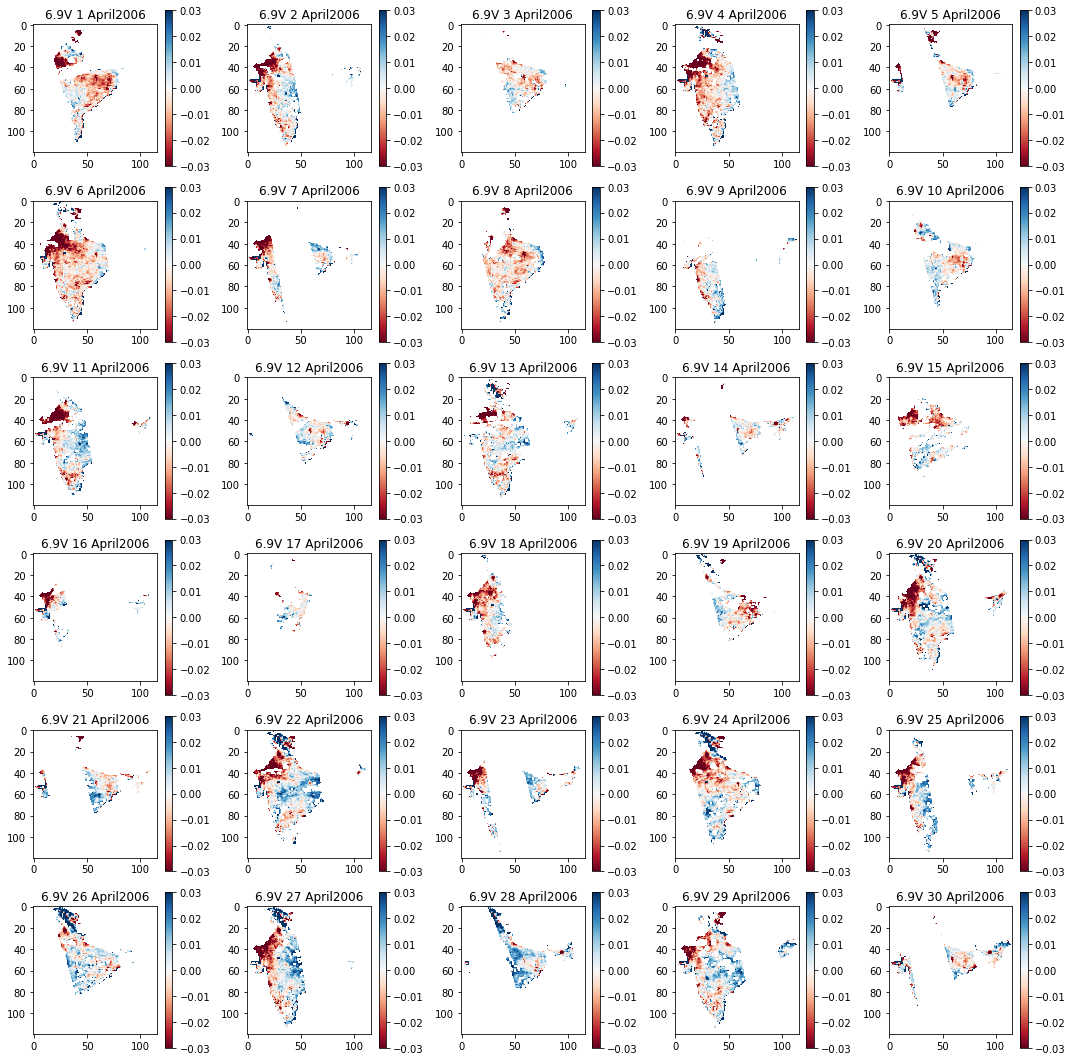

In [4]:
folder_diff_emiss=r'E:\rahul\processed_data\Emissivity_difference_6GHzV'
f_diff_emiss=[]
for root, dirs, files in os.walk(folder_diff_emiss):
    for names in files:
        full_path=os.path.join(root,names)
        print(full_path)
        f_diff_emiss.append(full_path)